In [0]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    def value(self):
        return np.array([self.x,self.y]) 
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [0]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [0]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [0]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [0]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [0]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [0]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [0]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [0]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [0]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [0]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [0]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [0]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [0]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))

    progress = []
    best_progress = []
    best_route_overall = pop[rankRoutes(pop)[0][0]]
    best_gene_dist = 1 / rankRoutes(pop)[0][1]
    
    progress.append(1 / rankRoutes(pop)[0][1])
    best_progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        if (1 / rankRoutes(pop)[0][1]) < best_gene_dist : 
          best_gene_dist = (1 / rankRoutes(pop)[0][1])
          best_route_overall = pop[rankRoutes(pop)[0][0]]
          
        
        best_progress.append(best_gene_dist)
        progress.append(1 / rankRoutes(pop)[0][1])

        
        
        print('iteration: ' + str(i+1) + ' current best dist: ' + str(1 / rankRoutes(pop)[0][1]) + ' overall_best_dist: ' + str(best_gene_dist)) 
        
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    
    plt.plot(best_progress)
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return bestRoute,best_route_overall

In [0]:
def make_cities_array(gene):
  city_array = np.zeros([len(gene),2])
  j=0
  for i in gene:
    city_array[j] = i.value()
    j+=1
  return city_array

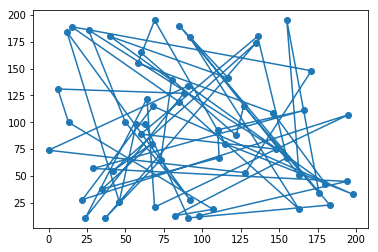

In [0]:
cityList = []

for i in range(0,60):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
    
city_array = make_cities_array(cityList)
plt.scatter(city_array[:,0],city_array[:,1])
plt.plot(city_array[:,0],city_array[:,1])

Initial distance: 5649.191280447743
iteration: 1 current best dist: 5530.5585782199505 overall_best_dist: 5530.5585782199505
iteration: 2 current best dist: 5481.710696803598 overall_best_dist: 5481.710696803598
iteration: 3 current best dist: 5481.710696803598 overall_best_dist: 5481.710696803598
iteration: 4 current best dist: 5481.710696803598 overall_best_dist: 5481.710696803598
iteration: 5 current best dist: 5415.708146302578 overall_best_dist: 5415.708146302578
iteration: 6 current best dist: 5435.186058908575 overall_best_dist: 5415.708146302578
iteration: 7 current best dist: 5200.973732716396 overall_best_dist: 5200.973732716396
iteration: 8 current best dist: 5200.5450678480565 overall_best_dist: 5200.5450678480565
iteration: 9 current best dist: 5106.906243546683 overall_best_dist: 5106.906243546683
iteration: 10 current best dist: 4937.933045724674 overall_best_dist: 4937.933045724674
iteration: 11 current best dist: 4937.933045724674 overall_best_dist: 4937.933045724674
i

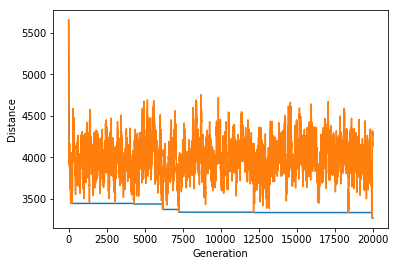

In [0]:
current_gene, best_gene = geneticAlgorithmPlot(population=cityList, popSize=10, eliteSize=3, mutationRate=0.01, generations=20000)

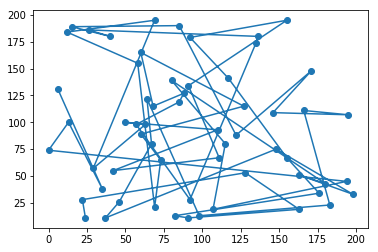

In [0]:
current_gene_array = make_cities_array(current_gene)
plt.scatter(current_gene_array[:,0],current_gene_array[:,1])
plt.plot(current_gene_array[:,0],current_gene_array[:,1])

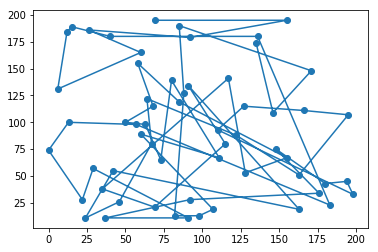

In [0]:
best_gene_array = make_cities_array(best_gene)
plt.scatter(best_gene_array[:,0],best_gene_array[:,1])
plt.plot(best_gene_array[:,0],best_gene_array[:,1])
